<a href="https://colab.research.google.com/github/whoIB/datascience/blob/main/hate_speech_and_offensive_language_detection_with_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Natural language Processing is Machine Learning Technigue for text-based problems. Hate Speech and Offensive Language Detection
Steps:
1.   Preprocessing
2.   Splitting
3.   Tokenization and Padding
4.   Create model and Train
5.   Evaluate


# Preprocessing (Importing Libraries and Cleaning Datasets)




## 1.   Importing Libraries





In [ ]:
#!pip install tensorflow
#!pip install -U scikit-learn
import pandas as pd # read the csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
#import sklearn
import re # regex to detect username, url, html entity
import nltk # to use word tokenize (split the sentence into words)
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords # to remove the stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from keras.utils import to_categorical
from keras import backend as K

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## 2.   Read and Clean Data



In [ ]:
data = pd.read_csv('/content/hsol_labeled_data.csv')

data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
data.shape
# shape method to know how many tweets are in the dataset

(24783, 7)

In [ ]:
tweet = list(data['tweet'])
labels = list(data['class'])
# extract the text and labels
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
data.drop_duplicates()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
data.rename(columns = {'class':'labels'}, inplace = True)
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,labels,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
#notes : all of the function taking 1 text at a time
stop_words = set(stopwords.words('english'))
# add rt to remove retweet in dataset (noise)
stop_words.add("rt")

# remove html entity:
def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

# change the user tags
def change_user(raw_text):
    regex = r"@([^ ]+)"
    text = re.sub(regex, "user", raw_text)

    return text

# remove urls
def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)

    return text

# remove unnecessary symbols
def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')

    return text

# remove stopwords
def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)

    return text

## this function in to clean all the dataset by utilizing all the function above
def preprocess(datas):
    clean = []
    # change the @xxx into "user"
    clean = [change_user(text) for text in datas]
    # remove emojis (specifically unicode emojis)
    clean = [remove_entity(text) for text in clean]
    # remove urls
    clean = [remove_url(text) for text in clean]
    # remove trailing stuff
    clean = [remove_noise_symbols(text) for text in clean]
    # remove stopwords
    clean = [remove_stopwords(text) for text in clean]

    return clean

Import the natural language toolkit library (nltk)

1.   From nltk.corpus import stopwords to remove noise from the text files i.e. tweets. These noice elements include html, usertags, urls and symbols like puntuation marks
2.   Tokenizaton occurs when strings are split into a list of words, characters and/or punctuations known as tokens. These tokens are easier to process and analyse.




In [ ]:
clean_tweet = preprocess(tweet)
clean_tweet
data['tweet'] = clean_tweet
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,labels,tweet
0,0,3,0,0,3,2,user woman shouldnt complain cleaning house . ...
1,1,3,0,3,0,1,user boy dats cold.tyga dwn bad cuffin dat hoe...
2,2,3,0,3,0,1,user Dawg user ever fuck bitch start cry ? con...
3,3,3,0,2,1,1,user user look like tranny
4,4,6,0,6,0,1,user shit hear might true might faker bitch to...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,yous muthaf * * * lie user user user right TL ...
24779,25292,3,0,1,2,2,"youve gone broke wrong heart baby , drove redn..."
24780,25294,3,0,3,0,1,young buck wan na eat dat nigguh like aint fuc...
24781,25295,6,0,6,0,1,youu got wild bitches tellin lies


In [ ]:
data.drop(data.columns [[0, 1, 2, 3, 4]],axis=1, inplace=True)
data

,labels,tweet
0,2,user woman shouldnt complain cleaning house . ...
1,1,user boy dats cold.tyga dwn bad cuffin dat hoe...
2,1,user Dawg user ever fuck bitch start cry ? con...
3,1,user user look like tranny
4,1,user shit hear might true might faker bitch to...
...,...,...
24778,1,yous muthaf * * * lie user user user right TL ...
24779,2,"youve gone broke wrong heart baby , drove redn..."
24780,1,young buck wan na eat dat nigguh like aint fuc...
24781,1,youu got wild bitches tellin lies


# Splitting Data into Test, Train  and Validation sets

Once the data is clean. the researcher would process to split the data into train and test sets. this is done in order to evaluate the performance of the machine learning model. this data set was split into 60% train, 20% validation and 20% test. The size of the dataset as at training is 24783 rows and 2 columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweet, labels, test_size=0.2, random_state=42)

Tokenize text to sequence

In [ ]:
## Tokenizing -> basically we use tokenisation for many things, its commonly used for feature extraction in preprocessing.
# declare the tokenizer
tokenizer = Tokenizer()
# build the vocabulary based on train dataset
tokenizer.fit_on_texts(X_train)
# tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# vocabulary size (num of unique words) -> will be used in embedding layer
vocab_size = len(tokenizer.word_index) + 1


Padding to make sequences uniform and identify outliers

In [ ]:
## Padding -> to uniform the datas
max_length = max(len(seq) for seq in X_train)

# to test an outlier case (if one of the test dataset has longer length)
for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

an outlier detected: [4, 75, 90, 117, 17, 830, 1, 3538, 13, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 1808, 52]
an outlier detected: [45, 972, 282, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 4065, 175, 1, 139, 282, 100, 316, 29, 36, 2, 33]


Derive test and train sets

In [ ]:
y_test = to_categorical(y_test, num_classes=3)
y_train = to_categorical(y_train, num_classes=3)

In [ ]:
print(f"num test tweet: {y_test.shape[0]}")
print(f"num train tweet: {y_train.shape[0]}")

num test tweet: 4957
num train tweet: 19826


# Model Building
Model was measured against 3 metrics, namely recall, precision and recall

In [ ]:
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    precisions = precision(y_true, y_pred)
    recalls = recall(y_true, y_pred)
    return 2*((precisions*recalls)/(precisions+recalls+K.epsilon()))

In [ ]:
output_dim = 200

# LSTM model architechture (CNN + LSTM)
model = Sequential([
    # embedding layer is like idk
    Embedding(vocab_size, output_dim, input_length=max_length),
    # lstm for xxx
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    # dropout to prevent overfitting
    Dropout(0.5),
    # dense to connect the previous output with current layer
    Dense(128, activation="relu"),
    # dropout to prevent overfitting
    Dropout(0.5),
    # this is output layer, with 3 class (0, 1, 2)
    Dense(3, activation="softmax"),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1,precision, recall])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 200)           6303800   
                                                                 
 lstm (LSTM)                 (None, 64)                67840     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 6380347 (24.34 MB)
Trainable params: 63803

Epoch 1/10
248/248 [==============================] - 38s 154ms/step - loss: 0.0046 - accuracy: 0.9985 - f1: 0.9985 - precision: 0.9985 - recall: 0.9985 - val_loss: 0.9916 - val_accuracy: 0.8724 - val_f1: 0.8725 - val_precision: 0.8727 - val_recall: 0.8724
Epoch 2/10
248/248 [==============================] - 38s 152ms/step - loss: 0.0033 - accuracy: 0.9987 - f1: 0.9988 - precision: 0.9988 - recall: 0.9987 - val_loss: 1.0786 - val_accuracy: 0.8802 - val_f1: 0.8802 - val_precision: 0.8802 - val_recall: 0.8802
Epoch 3/10
248/248 [==============================] - 37s 150ms/step - loss: 0.0028 - accuracy: 0.9990 - f1: 0.9990 - precision: 0.9991 - recall: 0.9990 - val_loss: 1.0449 - val_accuracy: 0.8785 - val_f1: 0.8785 - val_precision: 0.8789 - val_recall: 0.8782
Epoch 4/10
248/248 [==============================] - 36s 145ms/step - loss: 0.0023 - accuracy: 0.9994 - f1: 0.9994 - precision: 0.9994 - recall: 0.9994 - val_loss: 1.1174 - val_accuracy: 0.8737 - val_f1: 0.8735 - val_precision: 

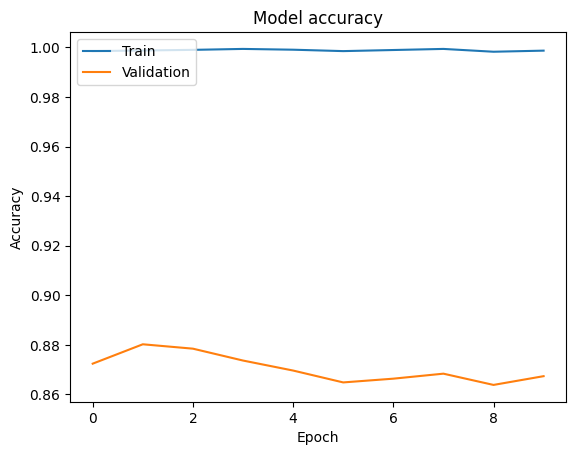

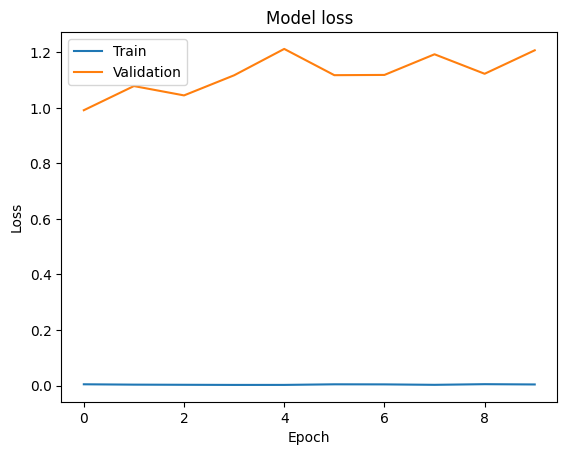

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,           # Adjust the number of epochs based on your dataset and training needs
    batch_size=64,       # Adjust batch size as needed
    validation_split=0.2 # If you have a validation set, specify the validation split
)

# Optionally, you can plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

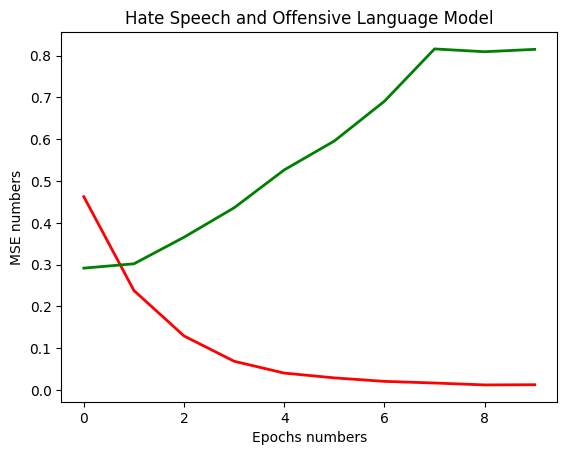

In [ ]:
import matplotlib.pyplot as plt
hist = model.history.history
plt.plot(hist['loss'],'r',linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('Hate Speech and Offensive Language Model')
plt.xlabel('Epochs numbers')
plt.ylabel('MSE numbers')
plt.show()

In [ ]:
# Save the entire model
model.save('hate_speech_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Importing necessary libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows of the dataset
data.head()

,labels,tweet
0,2,user woman shouldnt complain cleaning house . ...
1,1,user boy dats cold.tyga dwn bad cuffin dat hoe...
2,1,user Dawg user ever fuck bitch start cry ? con...
3,1,user user look like tranny
4,1,user shit hear might true might faker bitch to...


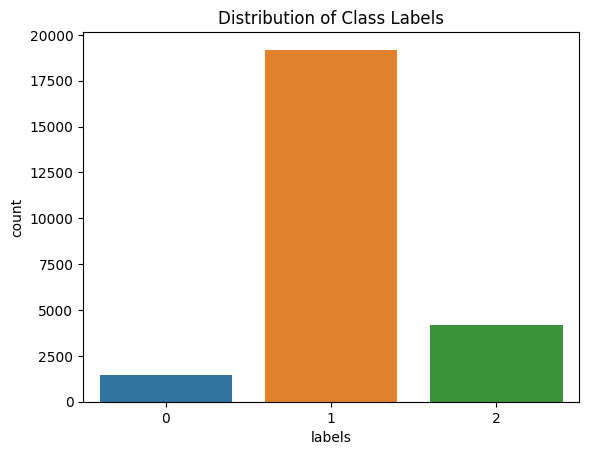

In [ ]:
# Checking the distribution of class labels
sns.countplot(x='labels', data=data)
plt.title('Distribution of Class Labels')
plt.show()

#class 0 = Hate Speech, 1 = Offensive Language and 2 = Neutral Language

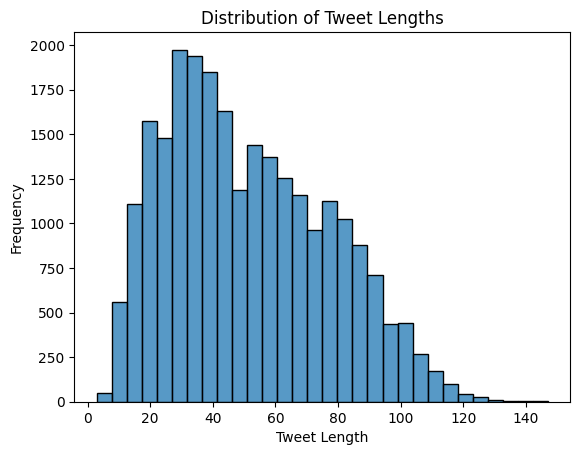

In [ ]:
# Visualizing the distribution of tweet lengths
data['tweet_length'] = data['tweet'].apply(len)
sns.histplot(data['tweet_length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

<ipython-input-29-c06f96db6dca>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_for_corr.corr()


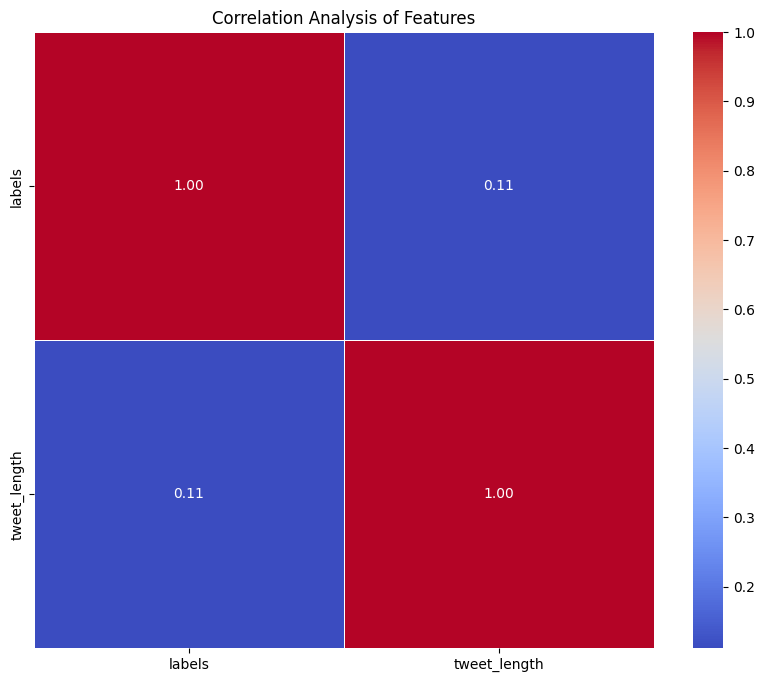

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already preprocessed the data and have it in 'data' DataFrame

# Drop unnecessary columns for correlation analysis
data_for_corr = data

# Calculate correlation matrix
corr_matrix = data_for_corr.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Analysis of Features')
plt.show()


In [ ]:
# Word cloud to visualize the most common words in tweets
from wordcloud import WordCloud

# Combine all tweets into a single string
all_tweets = ' '.join(data['tweet'])

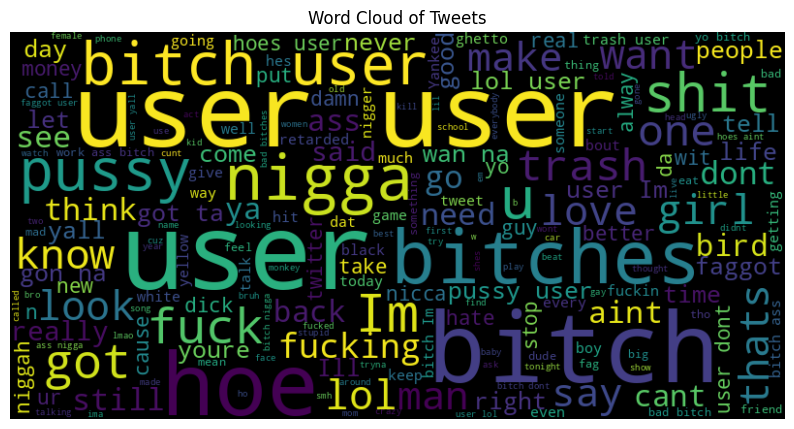

In [ ]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_tweets)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

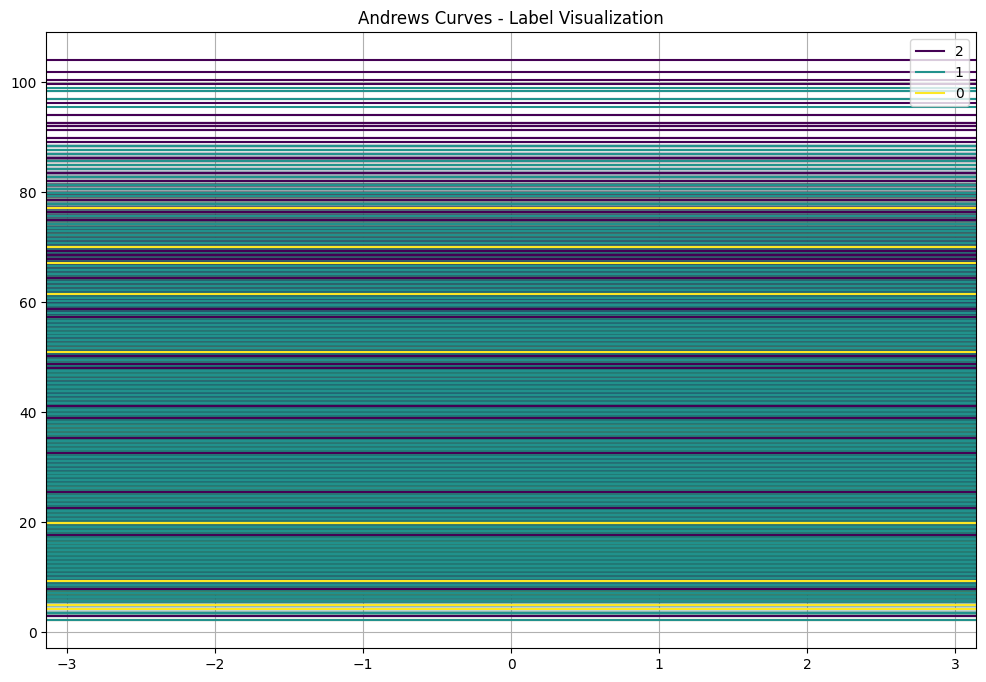

In [ ]:
import pandas.plotting as pd_plotting

data_for_andrews = data.drop(['tweet'], axis=1)

plt.figure(figsize=(12, 8))
pd_plotting.andrews_curves(data_for_andrews, 'labels', colormap='viridis')

plt.title('Andrews Curves - Label Visualization')
plt.show()